# Main plots for the paper

We want to answer some questions, for each we can show a plot:
1) Can the single performance of a single faulty QPU (even the best one) be beaten by distributing and merging results from a set of faulty QPUs?
2) If so, what is the best split and merge strategy if we fix the budget as the total number of shots employed?

In order to answer the first, it is sufficient to show the Hellinger distances of the single baseline for all QPU and the one coming from different split-merge strategies

In [6]:
import pandas as pd
import numpy as np

In [7]:
df5_all_ana=pd.read_csv('experiments/2024-06-10--16-13-26/experiments/2024-06-10--19-21-09/analysis/2024-06-11--14-11-25/analysis.csv.gz')
df8_all_ana=pd.read_csv('experiments/2024-06-11--20-52-27/experiments/2024-06-12--02-41-11/analysis/2024-06-12--23-23-27/analysis.csv.gz')
df_all_dict={5:df5_all_ana,8:df8_all_ana}

bk_all='ibm_kyoto/ibm_brisbane/ibm_osaka/ibm_sherbrooke'
df_all_bk_merged_dict={k:v[v['backends']==bk_all] for k,v in df_all_dict.items()}
s_policies=df_all_bk_merged_dict[5]['s_policy'].unique()
m_policies=df_all_bk_merged_dict[5]['m_policy'].unique()
s_policies=np.delete(s_policies,1)
m_policies=np.delete(m_policies,1)
print(s_policies,m_policies)

['fair' 'hellinger' 'mise'] ['fair' 'hellinger' 'mise']


In [8]:
#%matplotlib 
#import matplotlib.pyplot as plt
#import matplotlib
#matplotlib.rc('text', usetex = True)
#matplotlib.rc('font', **{'family' : "sans-serif"})
#params= {'text.latex.preamble' : [r'\usepackage{amsmath}']}
#plt.rcParams.update(params)
##import seaborn as sns
#
#
#backend_names_ibm=['ibm_kyoto', 'ibm_brisbane', 'ibm_osaka','ibm_sherbrooke']
#backend_names_all=df_all_dict[4][df_all_dict[4]['backends_len']==1]['backends'].unique()
#print(backend_names_all)                   
##circ_types=df_all_dict[4]['circuit'].unique()
##circ_types=[el for el in circ_types if not el in ['qftentangled','qaoa']]
#circ_types=['random', 'dj', 'ghz', 'grover-noancilla', 'qnn', 'vqe']
#x_pos=[0,0.1,0.2,0.3]+[0.5+0.1*ii for ii in range(len(s_policies)*len(m_policies))]
#markers={4:'v',8:'^'}
#colors={4:'blue',8:'orange'}
#
#fig, axs=plt.subplots(3,2,figsize=(10,7),sharex=True,gridspec_kw={'hspace':0.3,'wspace':0.3})
##axs=[axs,]
#axs=axs.ravel()
#plt.subplots_adjust(bottom=0.2)
#for ci,circ_type in enumerate(circ_types):
#    #df_circfix=d_exps[d_exps['circuit']==circ_type]
#    for k,vdic in df_all_dict.items():
#        print(k)
#        #df_baselines_circfix={k:vdic[(vdic['circuit']==circ_type) & (vdic['backends_len']==1)]}
#        best_dist=vdic[vdic['backends']==backend_names[0]]['distance'].iloc[0]
#        means_errs_per_backend=[]
#        for backend_name in backend_names:
#            sub_df=vdic[(vdic['backends']==backend_name)&(vdic['circuit']==circ_type)]
#            dists=sub_df['distance'] #**2
#            dists_err=sub_df['distance_err'] #*2*sub_df['distance']
#            weights=1./dists_err**2
#            weighted_err=np.sqrt(1./np.sum(weights))
#            weighted_mean=np.sum(dists*weights)*weighted_err**2
#            if weighted_mean<best_dist:
#                best_dist=weighted_mean
#            means_errs_per_backend.append({'backend':backend_name,'dist':weighted_mean,'derr':weighted_err})
#
#        df_all_bk_merged=vdic[(vdic['backends']==bk_all)&(vdic['circuit']==circ_type)]
#
##        s_policies=df_all_bk_merged['s_policy'].unique()
##        m_policies=df_all_bk_merged['m_policy'].unique()
##        s_policies=np.delete(s_policies,1) #removes random policy
##        m_policies=np.delete(m_policies,1)
#
#        means_errs_per_backend_new=means_errs_per_backend.copy()
#        for s_pol in s_policies:
#            for m_pol in m_policies:
#                sub_df=df_all_bk_merged[(df_all_bk_merged['s_policy']==s_pol)&(df_all_bk_merged['m_policy']==m_pol)]
#                dists=sub_df['distance'] #**2
#                dists_err=sub_df['distance_err'] #*2*sub_df['distance']
#                weights=1./dists_err**2
#                weighted_err=np.sqrt(1./np.sum(weights))
#                weighted_mean=np.sum(dists*weights)*weighted_err**2
#                means_errs_per_backend_new.append({'backend':f"{s_pol}-{m_pol}",'dist':weighted_mean,'derr':weighted_err})
#
#        ax=axs[ci]
#        ax.axhline(best_dist,linestyle='--',alpha=0.5,color=colors[k])
#        df_plot_all_fixcirc=pd.DataFrame.from_dict(means_errs_per_backend_new)
#        for rgs_i, rgs in enumerate([range(0,4),range(4,len(x_pos))]):
#            if rgs_i==0:
#                ax.errorbar(np.array(x_pos)[rgs],df_plot_all_fixcirc['dist'].to_numpy()[rgs],yerr=df_plot_all_fixcirc['derr'].to_numpy()[rgs],linestyle='',ecolor='r', color=colors[k], markersize=4,marker=markers[k],label=f"$n_q = {k}$")
#            else:
#                (plotline, _, _)=ax.errorbar(np.array(x_pos)[rgs],df_plot_all_fixcirc['dist'].to_numpy()[rgs],yerr=df_plot_all_fixcirc['derr'].to_numpy()[rgs],linestyle='',ecolor='r',color=colors[k],markersize=4,marker=markers[k])
#                plotline.set_markerfacecolor('none')
#                plotline.set_markeredgewidth(0.8)
#        ax.set_title(circ_type)
#        if ci%2==0:
#            ax.set_ylabel(r'$d_{H}$')
#        ax.set_xticks(x_pos)
#        ax.set_xticklabels(df_plot_all_fixcirc['backend'],rotation=90)
#    #    ax.set_yscale('log')
#        ax.grid()
#        if ci==0:
#            ax.legend(fontsize=14)
#        
##for ii in [4,5]:
##    axs[ii].text((x_pos[0] + x_pos[3]) / 2,  -0.28, "single QPU", ha='center', va='bottom')
##    axs[ii].text((x_pos[4] + x_pos[-1]) / 2, -0.28, "all QPUs", ha='center', va='bottom')
#
##axs[4].set_xticks(rotation=90)

In [9]:
poly_dict={'fair':'uniform','hellinger':'hellinger','mise':'mise'}

## Single to all

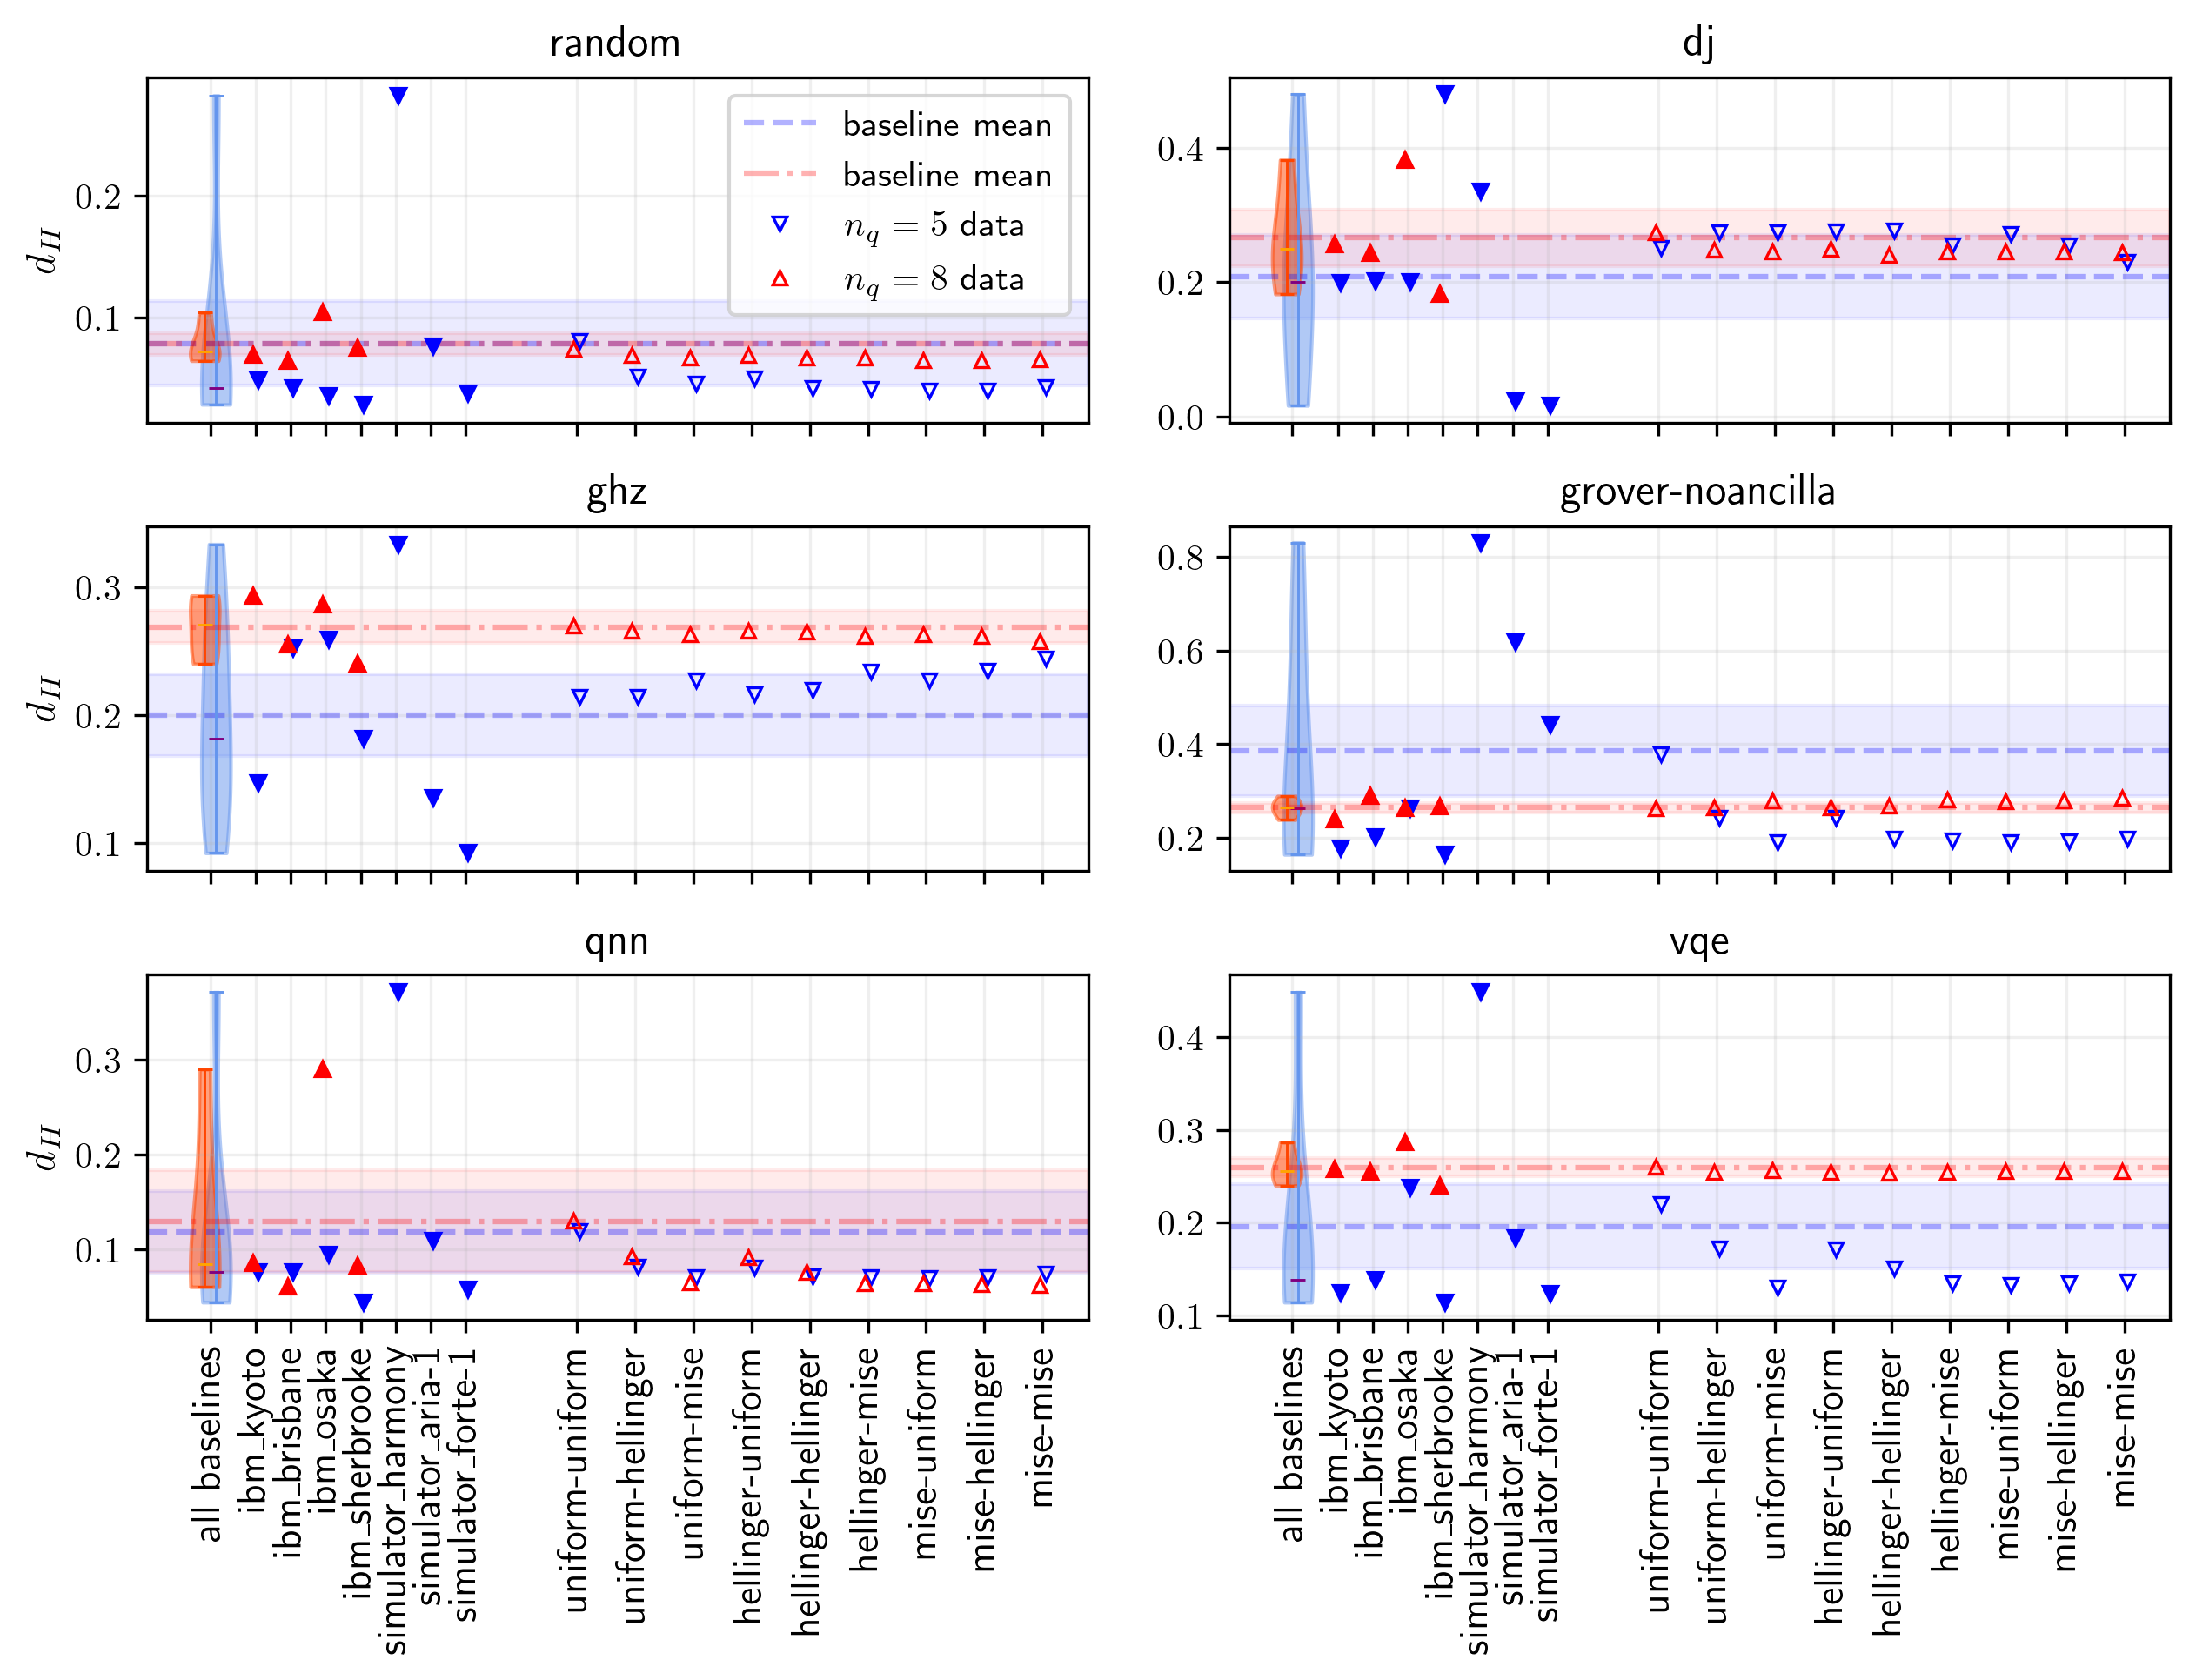

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
#import seaborn as sns
matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family' : "sans-serif"})
plt.rcParams['text.latex.preamble'] =  " \\usepackage{amsmath} "


fs=11

single_q=None
plot_best_lines=False
plot_aver_lines=True
plot_aver_regions=False
plot_errors=False
plot_violin_baselines=True
plot_boxplot_baselines=False

assert not (plot_violin_baselines and plot_boxplot_baselines)

ds1=0.6
dgap=1.3
ds2=1

markers={5:'v',8:'^'}
colors={5:'blue',8:'red'}
colors_lighter={5:'cornflowerblue',8:'orangered'}
colors_alt={5:'purple',8:'orange'}
hatches={5:'\\', 8:'///'}
lstyles={5:'--',8:'-.'}
eps=1e-5


backend_names_ibm=['ibm_kyoto', 'ibm_brisbane', 'ibm_osaka','ibm_sherbrooke']
backend_names_all=df_all_dict[5][df_all_dict[5]['backends_len']==1]['backends'].unique()
bk_all_ibm='/'.join(backend_names_ibm)
bk_all_all='/'.join(backend_names_all)
#circ_types=df_all_dict[5]['circuit'].unique()
#circ_types=[el for el in circ_types if not el in ['qftentangled','qaoa']]
circ_types=['random', 'dj', 'ghz', 'grover-noancilla', 'qnn', 'vqe']
#x_pos_ibm=[0,0.1,0.2,0.3,]+[0.8+0.1*ii for ii in range(len(s_policies)*len(m_policies))]
x_pos_all=list(np.arange(0,7*ds1-eps,ds1))+list(dgap+7*ds1+np.arange(0.,ds2*len(s_policies)*len(m_policies)-eps,ds2))
x_pos_ibm=list(np.arange(0,4*ds1-eps,ds1))+list(dgap+7*ds1+np.arange(0.,ds2*len(s_policies)*len(m_policies)-eps,ds2))

fig, axs=plt.subplots(3,2,figsize=(10,7),sharex=True,gridspec_kw={'hspace':0.3,'wspace':0.15},dpi=300)
#axs=[axs,]
axs=axs.ravel()
plt.subplots_adjust(bottom=0.2)
for ci,circ_type in enumerate(circ_types):
    #df_circfix=d_exps[d_exps['circuit']==circ_type]
    for ki, (k,vdic) in enumerate(df_all_dict.items()):
        if (single_q is not None) and (single_q!=k):
            continue
            
        # baselines single QPUs
        single_q_str=f"$n_q={k}$ " if single_q is None else ""
        backend_names=backend_names_all if ki==0 else backend_names_ibm
        if plot_best_lines:
            best_dist=vdic[vdic['backends']==backend_names[0]]['distance'].iloc[0]
        means_errs_per_backend=[]
        for backend_name in backend_names:
            sub_df=vdic[(vdic['backends']==backend_name)&(vdic['circuit']==circ_type)]
            dists=sub_df['distance'] #**2
            dists_err=sub_df['distance_err'] #*2*sub_df['distance']
            weights=1./dists_err**2
            weighted_err=np.sqrt(1./np.sum(weights))
            weighted_mean=np.sum(dists*weights)*weighted_err**2
#            print(dists_err/dists,weighted_err/weighted_mean)
            if plot_best_lines:
                if weighted_mean<best_dist:
                    best_dist=weighted_mean
            means_errs_per_backend.append({'backend':backend_name,'dist':weighted_mean,'derr':weighted_err*np.sqrt(len(dists))})

        # all QPUs
        bk_all=bk_all_all if ki==0 else bk_all_ibm
        df_all_bk_merged=vdic[(vdic['backends']==bk_all)&(vdic['circuit']==circ_type)]

        means_errs_per_backend_new=means_errs_per_backend.copy()
        for s_pol in s_policies:
            for m_pol in m_policies:
                sub_df=df_all_bk_merged[(df_all_bk_merged['s_policy']==s_pol)&(df_all_bk_merged['m_policy']==m_pol)]
                dists=sub_df['distance'] #**2
                dists_err=sub_df['distance_err'] #*2*sub_df['distance']
                weights=1./dists_err**2
                weighted_err=np.sqrt(1./np.sum(weights))
                weighted_mean=np.sum(dists*weights)*weighted_err**2
                means_errs_per_backend_new.append({'backend':f"{poly_dict[s_pol]}-{poly_dict[m_pol]}",'dist':weighted_mean,'derr':weighted_err*np.sqrt(len(dists))})

        ax=axs[ci]
        
        
        # baseline plots
        if plot_best_lines:
            ax.axhline(best_dist,linestyle='--',alpha=0.5,color=colors[k])
        df_plot_all_fixcirc=pd.DataFrame.from_dict(means_errs_per_backend_new)
        x_pos=x_pos_all if ki==0 else x_pos_ibm
        
        ki_shift=(1-2*ki)*ds1*0.08
        if plot_aver_regions or plot_aver_lines:
            #std_baselines=1./np.sqrt(np.sum([1./el['derr']**2 for el in means_errs_per_backend]))
            #aver_baselines=np.sum([el['dist']/el['derr']**2 for el in means_errs_per_backend])*std_baselines**2
            #std_baselines*=10*np.sqrt(len(means_errs_per_backend))
            aver_baselines=np.mean([el['dist'] for el in means_errs_per_backend])
            std_baselines=np.std([el['dist'] for el in means_errs_per_backend],ddof=1)
            if plot_aver_regions:
                ax.axhspan(aver_baselines-std_baselines,aver_baselines+std_baselines,alpha=0.4,color='none',edgecolor=colors[k],hatch=hatches[k])
            elif plot_aver_lines:
                ax.axhline(aver_baselines,alpha=0.3,color=colors[k],linestyle=lstyles[k],label=f'baseline mean')
                std_baselines/=np.sqrt(len(means_errs_per_backend))
                ax.axhspan(aver_baselines-std_baselines,aver_baselines+std_baselines,alpha=0.08,color=colors[k])
        
        rggs=[range(0,len(backend_names)),range(len(backend_names),len(x_pos))]
        for rgs_i, rgs in enumerate(rggs):
            if rgs_i==0:
                ax.errorbar(np.array(x_pos)[rgs]+ki_shift,df_plot_all_fixcirc['dist'].to_numpy()[rgs],yerr=df_plot_all_fixcirc['derr'].to_numpy()[rgs],linestyle='',ecolor='r' if plot_errors else 'none', color=colors[k], markersize=4,marker=markers[k])
            else:
                (plotline, _, _)=ax.errorbar(np.array(x_pos)[rgs]+ki_shift,df_plot_all_fixcirc['dist'].to_numpy()[rgs],yerr=df_plot_all_fixcirc['derr'].to_numpy()[rgs],linestyle='',ecolor='r' if plot_errors else 'none',color=colors[k],markersize=4,marker=markers[k],label=f"{single_q_str}data")
                plotline.set_markerfacecolor('none')
                plotline.set_markeredgewidth(0.8)
                
        # box/violin plots for all baselines
        if plot_violin_baselines:
            all_fixcirc_dist_data=df_plot_all_fixcirc['dist'].to_numpy()[rggs[0]]
            violin_parts = ax.violinplot(all_fixcirc_dist_data,positions=[-ds1*1.3+2*ki_shift],showmeans=False,showmedians=True)
            for vp in violin_parts['bodies']:
                vp.set_facecolor(colors_lighter[k])
                vp.set_edgecolor(colors_lighter[k])
                vp.set_linewidth(1)
                vp.set_alpha(0.5)
            for partname in ('cbars','cmins','cmaxes','cmedians'): #,'cmeans'
                vp = violin_parts[partname]
                if partname=='cmedians':
                    vp.set_edgecolor(colors_alt[k])
                else:
                    vp.set_edgecolor(colors_lighter[k])
                vp.set_linewidth(0.7)
        if plot_boxplot_baselines:
            all_fixcirc_dist_data=df_plot_all_fixcirc['dist'].to_numpy()[rggs[0]]
            bplot = ax.boxplot(all_fixcirc_dist_data,positions=[-ds1*1.3+2*ki_shift],patch_artist=True,manage_ticks=False)
            for patch in bplot['boxes']:
                patch.set_facecolor(colors[k])
            
        # plot titles and ticks
        ax.set_title(circ_type)
        if ci%2==0:
            ax.set_ylabel(r'$d_{H}$',fontsize=fs)
        if ki==0:
            if plot_violin_baselines or plot_boxplot_baselines:
                ax.set_xticks([-ds1*1.3,]+x_pos)
                ax.set_xticklabels(['all baselines',]+list(df_plot_all_fixcirc['backend']),rotation=90,fontsize=fs)
            else:
                ax.set_xticks(x_pos)
                ax.set_xticklabels(df_plot_all_fixcirc['backend'],rotation=90,fontsize=fs)
    #    ax.set_yscale('log')
        if circ_type=='random':
            ax.legend(fontsize=10,loc='upper right')
        
        ax.grid(alpha=0.2)
#for ii in [4,5]:
#    axs[ii].text((x_pos[0] + x_pos[3]) / 2,  -0.28, "single QPU", ha='center', va='bottom')
#    axs[ii].text((x_pos[4] + x_pos[-1]) / 2, -0.28, "all QPUs", ha='center', va='bottom')

#axs[4].set_xticks(rotation=90)
fout_str="comparison_singleQPU_allQPUs"
if plot_violin_baselines:
    fout_str+="_violin"
elif plot_boxplot_baselines:
    fout_str+="_box"
plt.savefig(fout_str+".pdf",bbox_inches='tight')

## Single to some by group size (fixed policies)

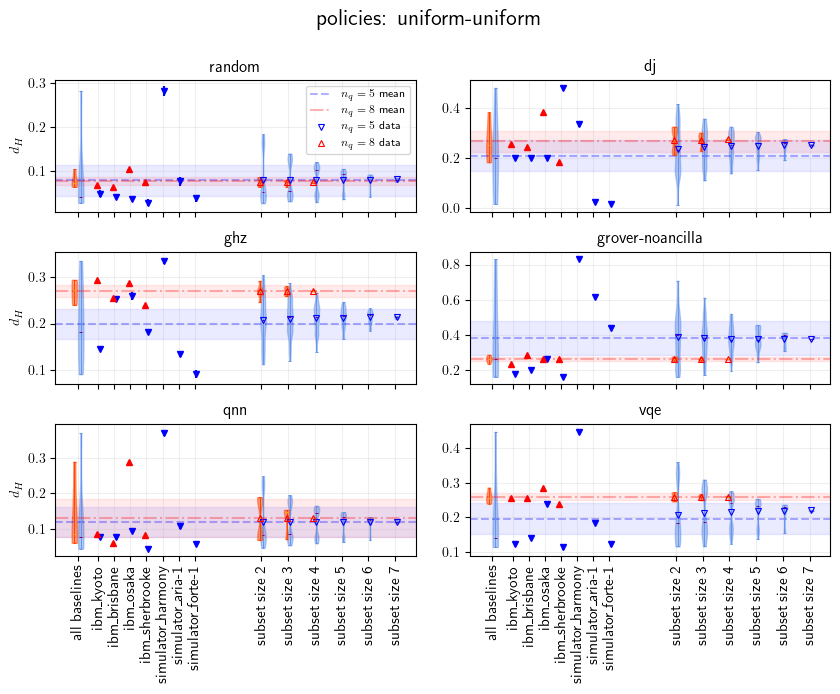

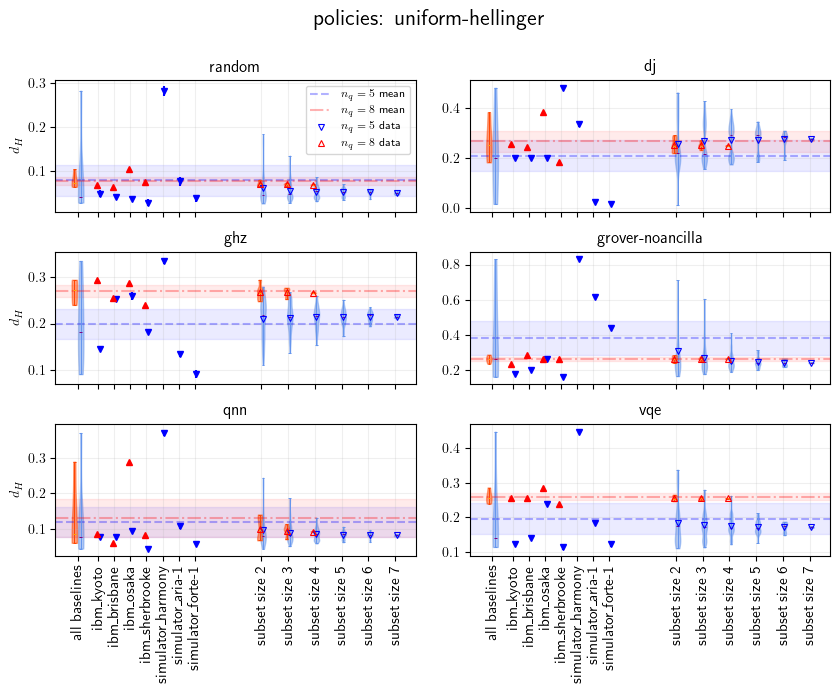

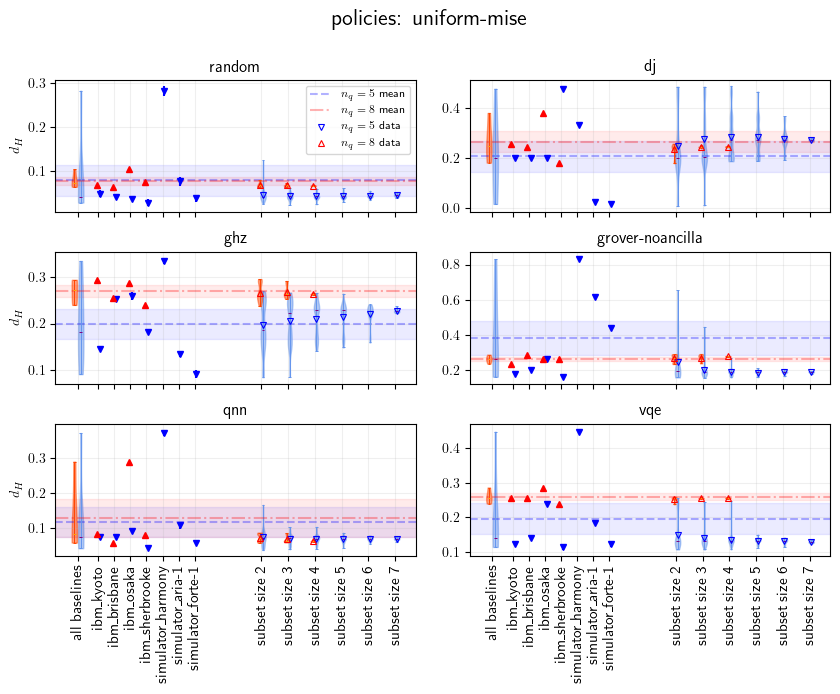

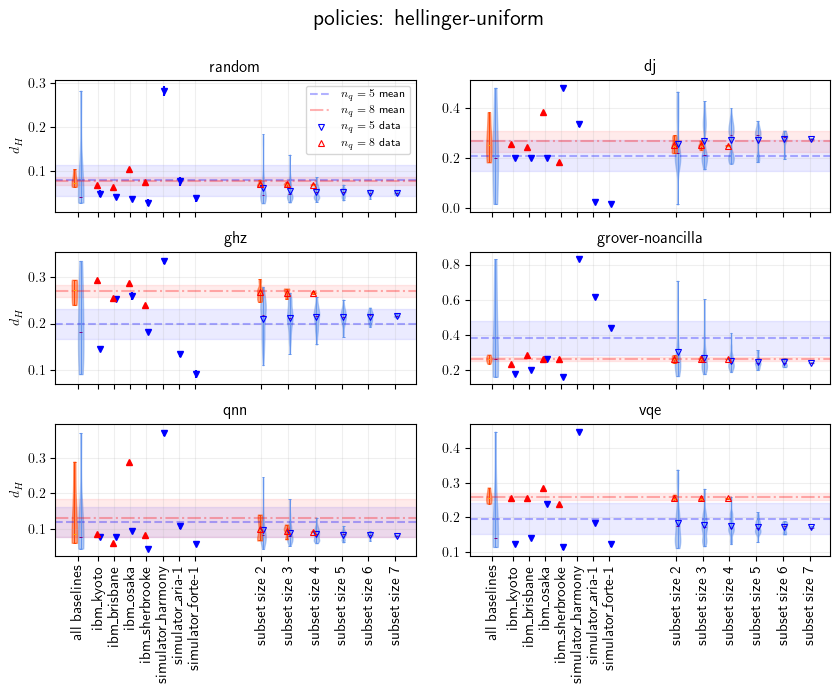

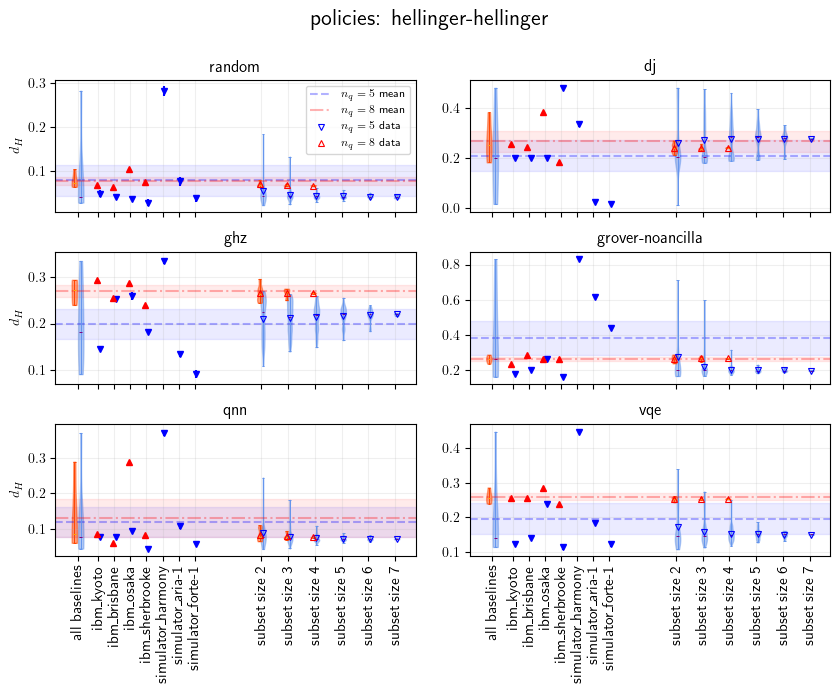

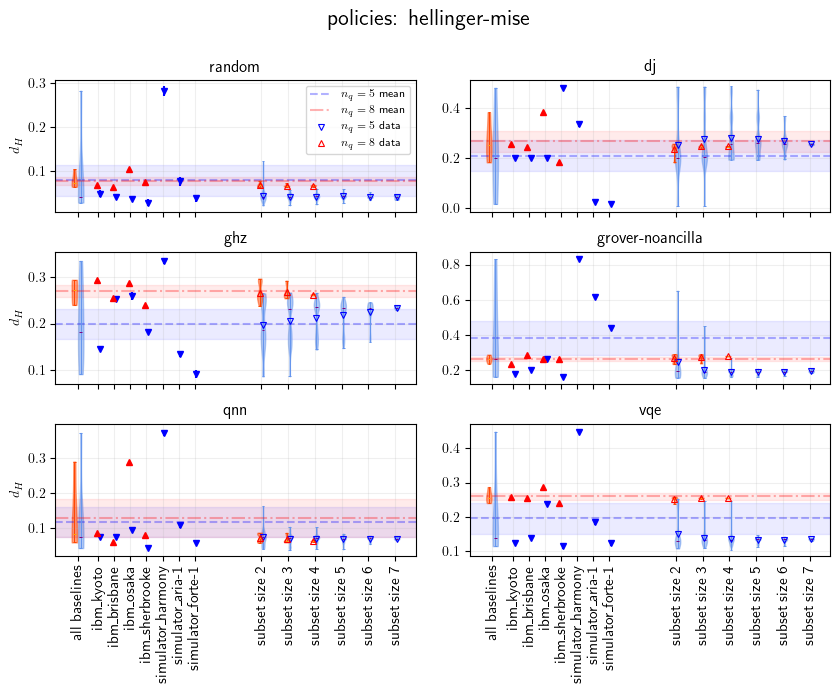

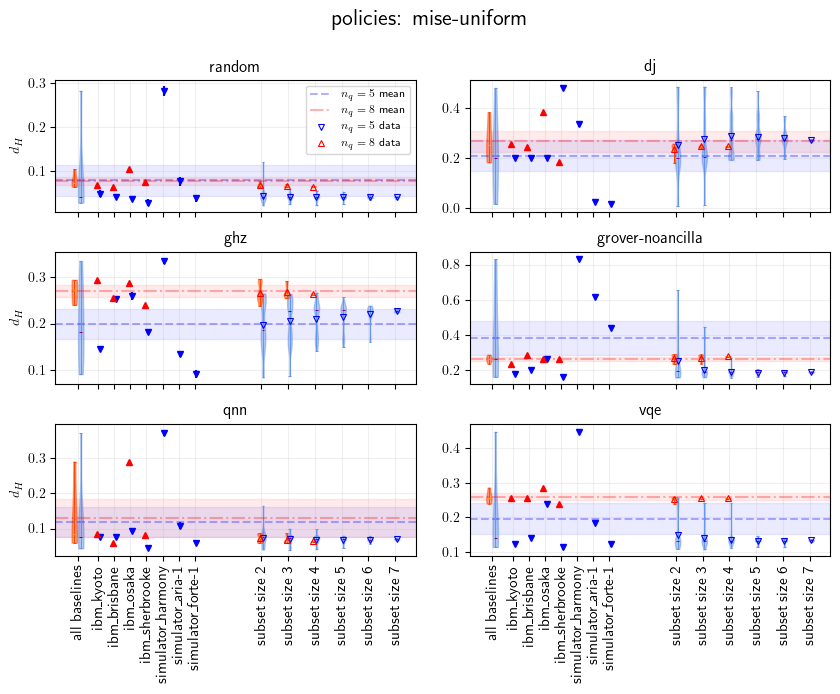

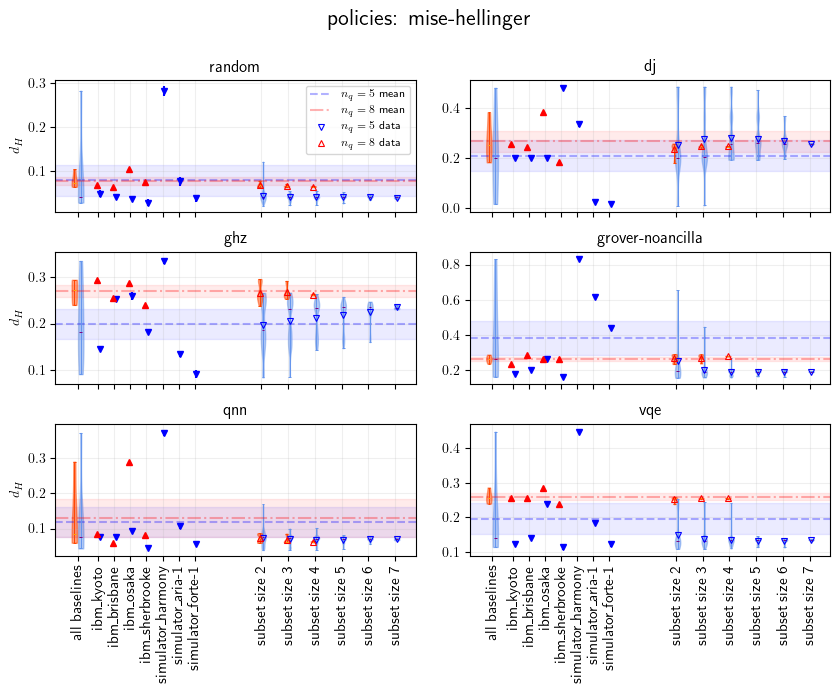

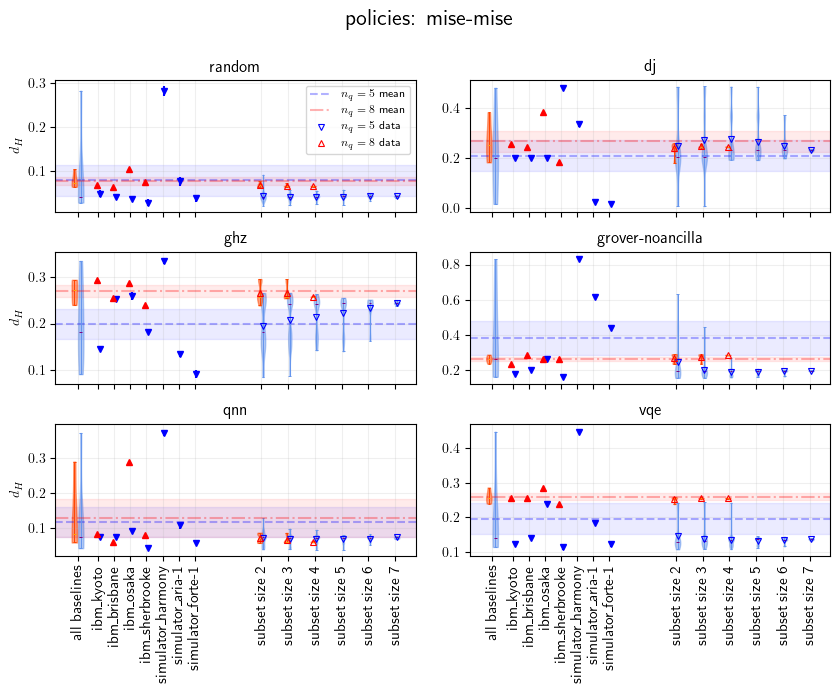

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family' : "sans-serif"})
plt.rcParams['text.latex.preamble'] =  " \\usepackage{amsmath} "


nqs=[5,8]
ds1=0.6
dgap=1.3
ds2=1
ki_shift_factor=0.1
eps=1e-5
fs=11
vp_width=0.2

single_q=None
plot_best_lines=False
plot_aver_lines=True
plot_aver_regions=False
plot_errors=True
plot_violin_baselines=True
plot_violin_subsets=True

#backend_names_ibm=['ibm_kyoto', 'ibm_brisbane', 'ibm_osaka','ibm_sherbrooke']
#backend_names_all_single={nq:df_all_dict[nq][df_all_dict[nq]['backends_len']==1]['backends'].unique() for nq in nqs}
backend_names_all_len={nq:{ln:df_all_dict[nq][df_all_dict[nq]['backends_len']==ln]['backends'].unique() for ln in range(1,int(np.max(df_all_dict[nq]['backends_len']))+1)} for nq in nqs}
#backend_names_all_len8={ln:df_all_dict[8][df_all_dict[8]['backends_len']==ln]['backends'].unique() for ln in range(1,len(backend_names_ibm))}
#print(backend_names_all_len)
#bk_all_ibm='/'.join(backend_names_ibm)
#bk_all_all='/'.join(backend_names_all)
#circ_types=df_all_dict[4]['circuit'].unique()
#circ_types=[el for el in circ_types if not el in ['qftentangled','qaoa']]
circ_types=['random', 'dj', 'ghz', 'grover-noancilla', 'qnn', 'vqe']
#x_pos_all=list(np.arange(0,7*ds1-eps,ds1))+list(dgap+7*ds1+np.arange(0.,ds2*len(s_policies)*len(m_policies)-eps,ds2))
#x_pos_ibm=list(np.arange(0,4*ds1-eps,ds1))+list(dgap+7*ds1+np.arange(0.,ds2*len(s_policies)*len(m_policies)-eps,ds2))
markers={5:'v',8:'^'}
colors={5:'blue',8:'red'}
colors_lighter={5:'cornflowerblue',8:'orangered'}
colors_alt={5:'purple',8:'orange'}
hatches={5:'\\', 8:'///'}
lstyles={5:'--',8:'-.'}

for s_pol in s_policies:
    for m_pol in m_policies:
        fig, axs=plt.subplots(3,2,figsize=(10,7),sharex=True,gridspec_kw={'hspace':0.3,'wspace':0.15})
        fig.suptitle(f"policies: {poly_dict[s_pol]}-{poly_dict[m_pol]}",fontsize=16)
        #axs=[axs,]
        axs=axs.ravel()
        plt.subplots_adjust(bottom=0.2)
        for ci,circ_type in enumerate(circ_types):
            #df_circfix=d_exps[d_exps['circuit']==circ_type]
            for ki, (k,vdic) in enumerate(df_all_dict.items()):
                if (single_q is not None) and (single_q!=k):
                    continue
                single_q_str=f"$n_q={k}$ " if single_q is None else ""

                # single QPUs part
                backend_names=backend_names_all_len[k][1]
                if plot_best_lines:
                    best_dist=vdic[vdic['backends']==backend_names[0]]['distance'].iloc[0]
                means_errs_per_backend=[]
                for backend_name in backend_names:
                    sub_df=vdic[(vdic['backends']==backend_name)&(vdic['circuit']==circ_type)]
                    dists=sub_df['distance'] #**2
                    dists_err=sub_df['distance_err'] #*2*sub_df['distance']
                    weights=1./dists_err**2
                    weighted_err=np.sqrt(1./np.sum(weights))
                    weighted_mean=np.sum(dists*weights)*weighted_err**2
                    weighted_err=np.std(dists,ddof=1)
        #            print(dists_err/dists,weighted_err/weighted_mean)
                    if plot_best_lines:
                        if weighted_mean<best_dist:
                            best_dist=weighted_mean
                    means_errs_per_backend.append({'backend':backend_name,'dist':weighted_mean,'derr':weighted_err*np.sqrt(len(dists))})

                means_errs_per_backend_new=means_errs_per_backend.copy()

                # multiple QPUs by group size
                max_gp_size=int(np.max(df_all_dict[k]['backends_len']))
                for gp_size in range(2,max_gp_size+1):
                    sub_df=vdic[(vdic['backends_len']==gp_size)&(vdic['circuit']==circ_type)&(vdic['s_policy']==s_pol)&(vdic['m_policy']==m_pol)]
                    dists=sub_df['distance'] #**2
                    dists_err=sub_df['distance_err'] #*2*sub_df['distance']
                    weights=1./dists_err**2
                    weighted_err=np.sqrt(1./np.sum(weights))
                    weighted_mean=np.sum(dists*weights)*weighted_err**2
                    # putting standard deviation
                    weighted_err=np.std(dists,ddof=1)
        #            print(dists_err/dists,weighted_err/weighted_mean)
                    means_errs_per_backend_new.append({'backend':f"subset size {gp_size}",'dist':weighted_mean,'derr':weighted_err})

                 #print(means_errs_per_backend_new)
        #        s_policies=df_all_bk_merged['s_policy'].unique()
        #        m_policies=df_all_bk_merged['m_policy'].unique()
        #        s_policies=np.delete(s_policies,1) #removes random policy
        #        m_policies=np.delete(m_policies,1)

        #        for s_pol in s_policies:
        #            for m_pol in m_policies:
        #                sub_df=df_all_bk_merged[(df_all_bk_merged['s_policy']==s_pol)&(df_all_bk_merged['m_policy']==m_pol)]
        #                dists=sub_df['distance'] #**2
        #                dists_err=sub_df['distance_err'] #*2*sub_df['distance']
        #                weights=1./dists_err**2
        #                weighted_err=np.sqrt(1./np.sum(weights))
        #                weighted_mean=np.sum(dists*weights)*weighted_err**2
        #                means_errs_per_backend_new.append({'backend':f"{s_pol}-{m_pol}",'dist':weighted_mean,'derr':weighted_err*np.sqrt(len(dists))})


                ax=axs[ci]

                ki_shift=(1-2*ki)*ds1*ki_shift_factor
                if plot_best_lines:
                    ax.axhline(best_dist,linestyle='--',alpha=0.5,color=colors[k])
                df_plot_all_fixcirc=pd.DataFrame.from_dict(means_errs_per_backend_new)
#                x_pos=list(np.arange(0,0.1*len(backend_names_all_len[k][1]),0.1))+list(np.arange(0.8,0.8+0.1*(max_gp_size-1)-1e-4,0.1))
                x_pos=list(np.arange(0,len(backend_names_all_len[k][1])*ds1-eps,ds1))+list(dgap+8*ds1+np.arange(0.,ds2*(max_gp_size-1)-eps,ds2))
        #        print(df_plot_all_fixcirc)
        #        print(len(df_plot_all_fixcirc),len(x_pos))

                if plot_aver_regions or plot_aver_lines:
                    #std_baselines=1./np.sqrt(np.sum([1./el['derr']**2 for el in means_errs_per_backend]))
                    #aver_baselines=np.sum([el['dist']/el['derr']**2 for el in means_errs_per_backend])*std_baselines**2
                    #std_baselines*=10*np.sqrt(len(means_errs_per_backend))
                    aver_baselines=np.mean([el['dist'] for el in means_errs_per_backend])
                    std_baselines=np.std([el['dist'] for el in means_errs_per_backend],ddof=1)
                    if plot_aver_regions:
                        ax.axhspan(aver_baselines-std_baselines,aver_baselines+std_baselines,alpha=0.4,color='none',edgecolor=colors[k],hatch=hatches[k])
                    elif plot_aver_lines:
                        ax.axhline(aver_baselines,alpha=0.3,color=colors[k],linestyle=lstyles[k],label=f'{single_q_str}mean')
                        std_baselines/=np.sqrt(len(means_errs_per_backend))
                        ax.axhspan(aver_baselines-std_baselines,aver_baselines+std_baselines,alpha=0.08,color=colors[k])

                rggs=[range(0,len(backend_names)),range(len(backend_names),len(x_pos))]
                for rgs_i, rgs in enumerate(rggs):
                    if rgs_i==0:
                        ax.errorbar(np.array(x_pos)[rgs]+ki_shift,df_plot_all_fixcirc['dist'].to_numpy()[rgs],yerr=df_plot_all_fixcirc['derr'].to_numpy()[rgs],linestyle='',ecolor=colors[k] if plot_errors else 'none', color=colors[k], markersize=4,marker=markers[k])
                    else:
                        all_fixcirc_dist_data=df_plot_all_fixcirc['dist'].to_numpy()[rgs]
                        if plot_violin_subsets:
                            dists=[(vdic[(vdic['backends_len']==gp_size)&(vdic['circuit']==circ_type)&(vdic['s_policy']==s_pol)&(vdic['m_policy']==m_pol)])['distance'].to_numpy() for gp_size in range(2,max_gp_size+1)]
                            for rri,rr in enumerate(rgs):
                                violin_parts = ax.violinplot([dists[rri],],positions=[x_pos[rr]+ki_shift],showmeans=False,showmedians=True,widths=vp_width)
                                for vp in violin_parts['bodies']:
                                    vp.set_facecolor(colors_lighter[k])
                                    vp.set_edgecolor(colors_lighter[k])
                                    vp.set_linewidth(1)
                                    vp.set_alpha(0.5)
                                for partname in ('cbars','cmins','cmaxes','cmedians'): #,'cmeans'
                                    vp = violin_parts[partname]
                                    if partname=='cmedians':
                                        vp.set_edgecolor(colors_alt[k])
                                    else:
                                        vp.set_edgecolor(colors_lighter[k])
                                    vp.set_linewidth(0.7)
                            (plotline, _, _)=ax.errorbar(np.array(x_pos)[rgs]+ki_shift,all_fixcirc_dist_data,yerr=None,linestyle='',ecolor=colors[k] if plot_errors else 'none',color=colors[k],markersize=4,marker=markers[k],label=f"{single_q_str}data")
                            plotline.set_markerfacecolor('none')
                            plotline.set_markeredgewidth(0.8)
                        else:
                            (plotline, _, _)=ax.errorbar(np.array(x_pos)[rgs]+ki_shift,df_plot_all_fixcirc['dist'].to_numpy()[rgs],yerr=df_plot_all_fixcirc['derr'].to_numpy()[rgs],linestyle='',ecolor=colors[k] if plot_errors else 'none',color=colors[k],markersize=4,marker=markers[k],label=f"{single_q_str}data")
                            plotline.set_markerfacecolor('none')
                            plotline.set_markeredgewidth(0.8)

                if plot_violin_baselines:
                    all_fixcirc_dist_data=df_plot_all_fixcirc['dist'].to_numpy()[rggs[0]]
                    violin_parts = ax.violinplot(all_fixcirc_dist_data,positions=[-ds1*1.3+2*ki_shift],showmeans=False,showmedians=True,widths=vp_width)
                    for vp in violin_parts['bodies']:
                        vp.set_facecolor(colors_lighter[k])
                        vp.set_edgecolor(colors_lighter[k])
                        vp.set_linewidth(1)
                        vp.set_alpha(0.5)
                        for partname in ('cbars','cmins','cmaxes','cmedians'): #,'cmeans'
                            vp = violin_parts[partname]
                            if partname=='cmedians':
                                vp.set_edgecolor(colors_alt[k])
                            else:
                                vp.set_edgecolor(colors_lighter[k])
                            vp.set_linewidth(0.7)
                        
                ax.set_title(circ_type)
                if ci%2==0:
                    ax.set_ylabel(r'$d_{H}$')
                if ki==0:
                    if plot_violin_baselines or plot_boxplot_baselines:
                        ax.set_xticks([-ds1*1.3,]+x_pos)
                        ax.set_xticklabels(['all baselines',]+list(df_plot_all_fixcirc['backend']),rotation=90,fontsize=fs)
                    else:
                        ax.set_xticks(x_pos)
                        ax.set_xticklabels(df_plot_all_fixcirc['backend'],rotation=90,fontsize=fs)
            #    ax.set_yscale('log')
                if circ_type=='random':
                    ax.legend(fontsize=8,loc='upper right')
                    #ax.legend(fontsize=8,loc='upper right',bbox_to_anchor=(1.5, 1.0))

                ax.grid(alpha=0.2)
        fout_str=f"comparison_singleQPU_groupedQPUs_poli_{poly_dict[s_pol]}-{poly_dict[m_pol]}"
        if plot_violin_baselines:
            fout_str+="_violin"
        if plot_violin_subsets:
            fout_str+="_violin"
        plt.savefig(fout_str+".pdf",bbox_inches='tight')
        plt.show()
#for ii in [4,5]:
#    axs[ii].text((x_pos[0] + x_pos[3]) / 2,  -0.28, "single QPU", ha='center', va='bottom')
#    axs[ii].text((x_pos[4] + x_pos[-1]) / 2, -0.28, "all QPUs", ha='center', va='bottom')

#axs[4].set_xticks(rotation=90)
#plt.savefig("comparison_singleQPU_groupedQPUs.pdf")

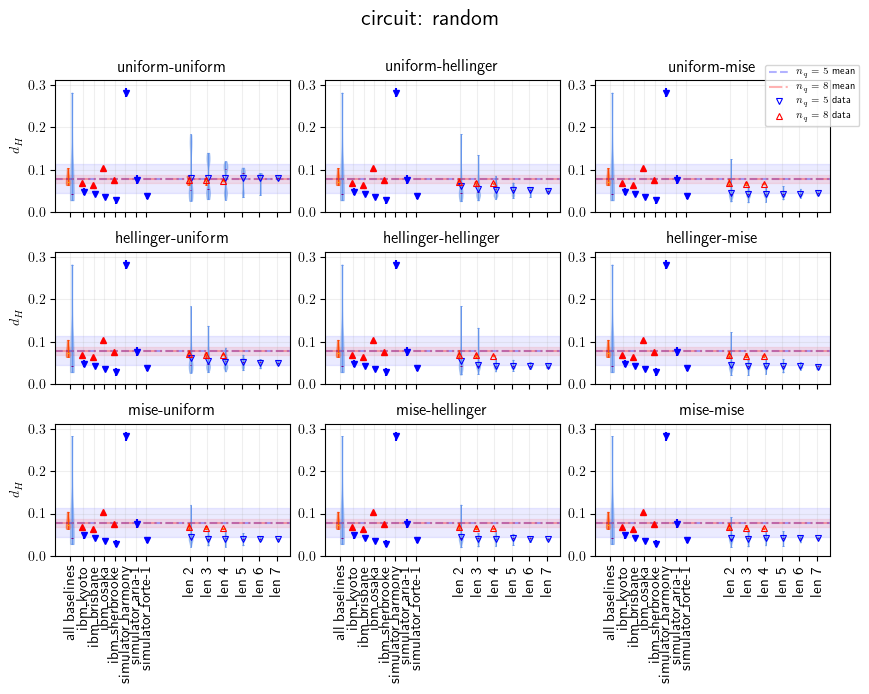

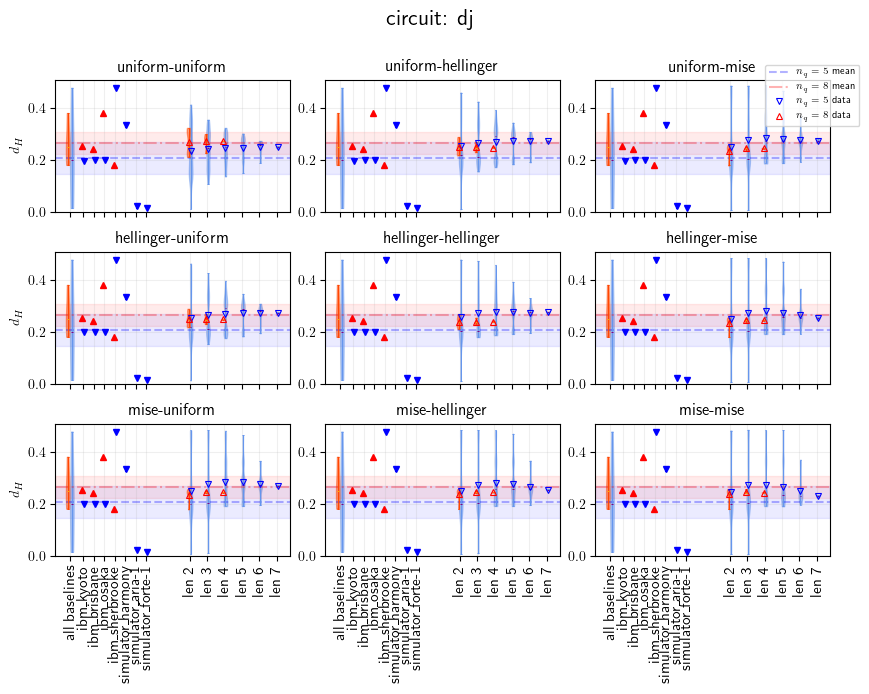

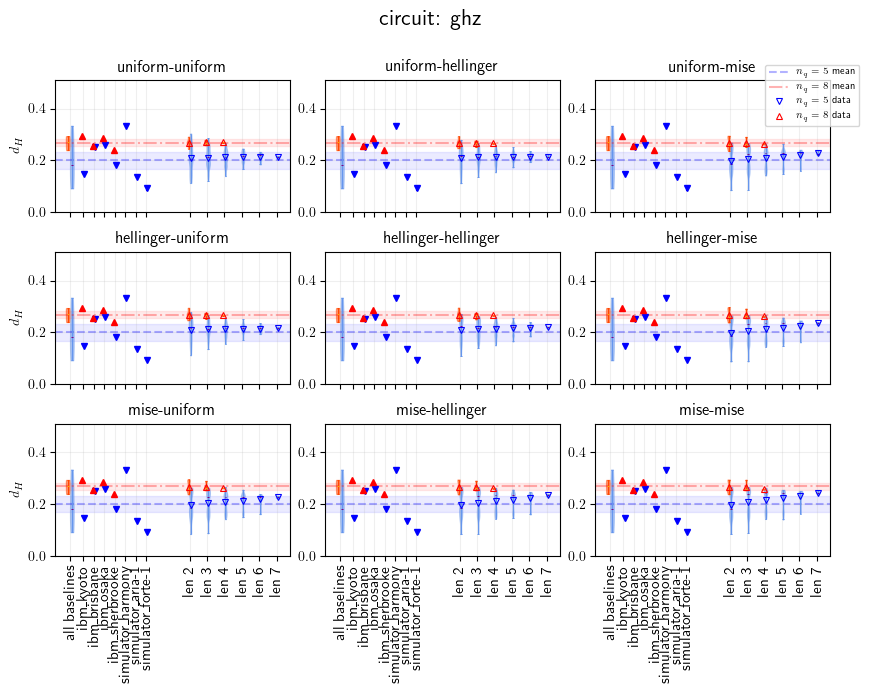

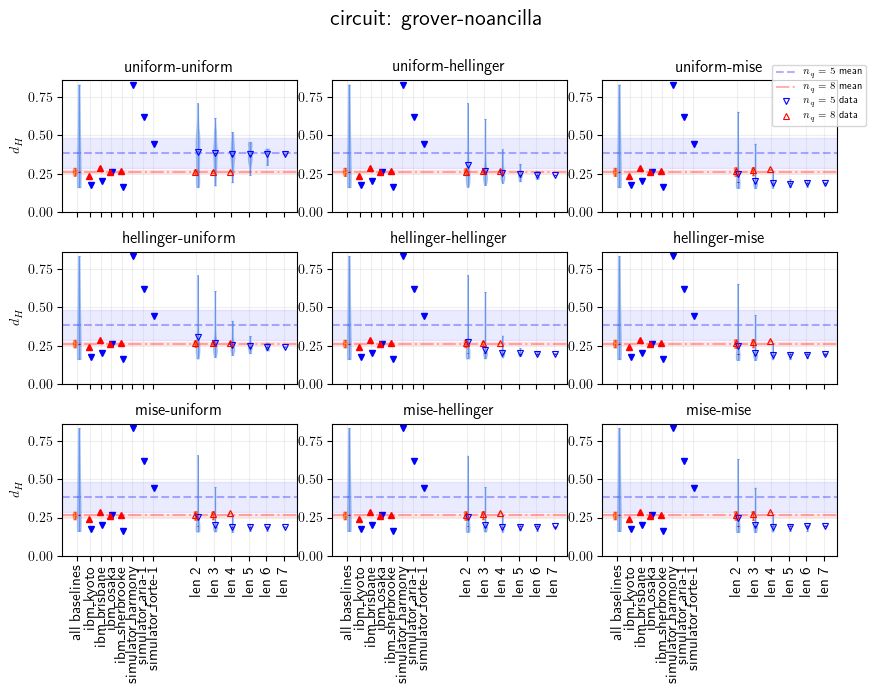

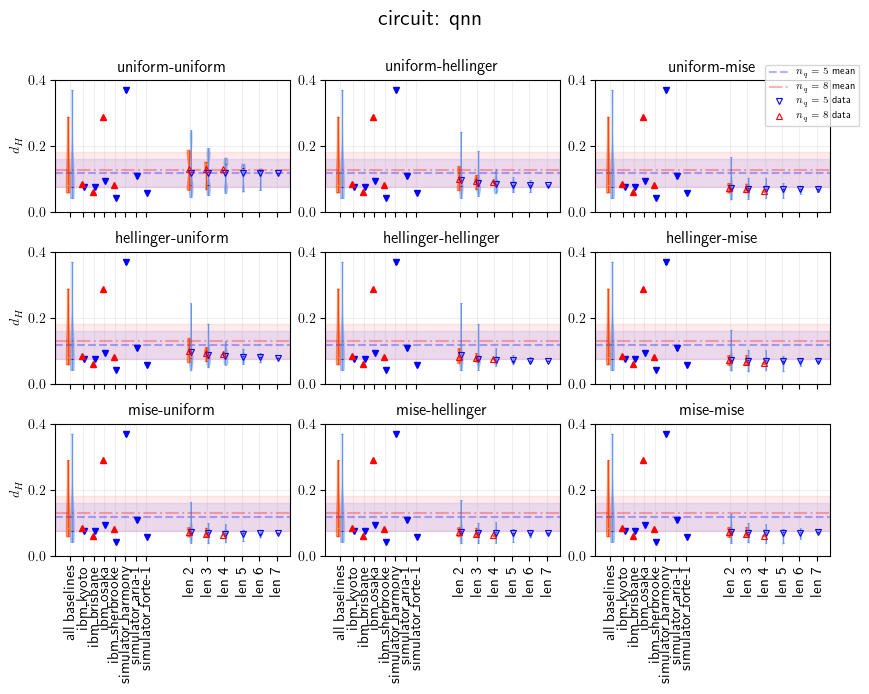

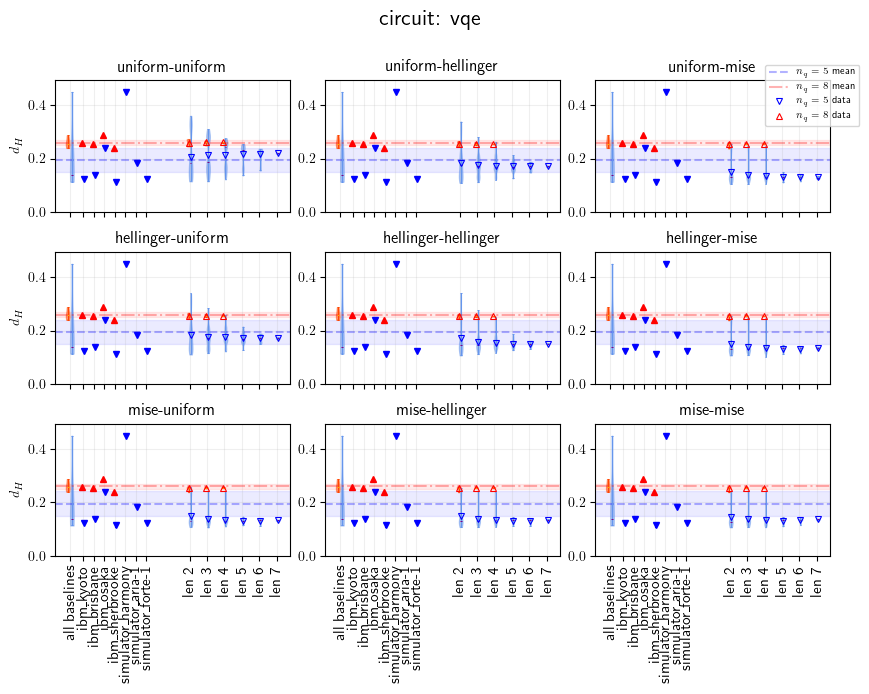

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family' : "sans-serif"})
plt.rcParams['text.latex.preamble'] =  " \\usepackage{amsmath} "


nqs=[5,8]
ds1=0.6
dgap=1.3
ds2=1
ki_shift_factor=0.1
eps=1e-5
fs=11
vp_width=0.2

single_q=None
plot_best_lines=False
plot_aver_lines=True
plot_aver_regions=False
plot_errors=True
plot_violin_baselines=True
plot_violin_subsets=True

#backend_names_ibm=['ibm_kyoto', 'ibm_brisbane', 'ibm_osaka','ibm_sherbrooke']
#backend_names_all_single={nq:df_all_dict[nq][df_all_dict[nq]['backends_len']==1]['backends'].unique() for nq in nqs}
backend_names_all_len={nq:{ln:df_all_dict[nq][df_all_dict[nq]['backends_len']==ln]['backends'].unique() for ln in range(1,int(np.max(df_all_dict[nq]['backends_len']))+1)} for nq in nqs}
#backend_names_all_len8={ln:df_all_dict[8][df_all_dict[8]['backends_len']==ln]['backends'].unique() for ln in range(1,len(backend_names_ibm))}
#print(backend_names_all_len)
#bk_all_ibm='/'.join(backend_names_ibm)
#bk_all_all='/'.join(backend_names_all)
#circ_types=df_all_dict[4]['circuit'].unique()
#circ_types=[el for el in circ_types if not el in ['qftentangled','qaoa']]
circ_types=['random', 'dj', 'ghz', 'grover-noancilla', 'qnn', 'vqe']
markers={5:'v',8:'^'}
colors={5:'blue',8:'red'}
colors_lighter={5:'cornflowerblue',8:'orangered'}
colors_alt={5:'purple',8:'orange'}
hatches={5:'\\', 8:'///'}
lstyles={5:'--',8:'-.'}


for ci,circ_type in enumerate(circ_types):
    fig, axs=plt.subplots(len(s_policies),len(m_policies),figsize=(10,7),sharex=True,gridspec_kw={'hspace':0.3,'wspace':0.15})
    fig.suptitle(f"circuit: {circ_type}",fontsize=16)
    #axs=[axs,]
    axs=axs.ravel()
    plt.subplots_adjust(bottom=0.2)
    pol_i=0
    for s_pol_i,s_pol in enumerate(s_policies):
        for m_pol in m_policies:
            #df_circfix=d_exps[d_exps['circuit']==circ_type]
            curr_ymax=0.
            for ki, (k,vdic) in enumerate(df_all_dict.items()):
                if (single_q is not None) and (single_q!=k):
                    continue
                single_q_str=f"$n_q={k}$ " if single_q is None else ""

                # single QPUs part
                backend_names=backend_names_all_len[k][1]
                if plot_best_lines:
                    best_dist=vdic[vdic['backends']==backend_names[0]]['distance'].iloc[0]
                means_errs_per_backend=[]
                for backend_name in backend_names:
                    sub_df=vdic[(vdic['backends']==backend_name)&(vdic['circuit']==circ_type)]
                    dists=sub_df['distance'] #**2
                    dists_err=sub_df['distance_err'] #*2*sub_df['distance']
                    weights=1./dists_err**2
                    weighted_err=np.sqrt(1./np.sum(weights))
                    weighted_mean=np.sum(dists*weights)*weighted_err**2
                    weighted_err=np.std(dists,ddof=1)
        #            print(dists_err/dists,weighted_err/weighted_mean)
                    if plot_best_lines:
                        if weighted_mean<best_dist:
                            best_dist=weighted_mean
                    means_errs_per_backend.append({'backend':backend_name,'dist':weighted_mean,'derr':weighted_err*np.sqrt(len(dists))})

                means_errs_per_backend_new=means_errs_per_backend.copy()

                # multiple QPUs by group size
                max_gp_size=int(np.max(df_all_dict[k]['backends_len']))
                for gp_size in range(2,max_gp_size+1):
                    sub_df=vdic[(vdic['backends_len']==gp_size)&(vdic['circuit']==circ_type)&(vdic['s_policy']==s_pol)&(vdic['m_policy']==m_pol)]
                    dists=sub_df['distance'] #**2
                    dists_err=sub_df['distance_err'] #*2*sub_df['distance']
                    weights=1./dists_err**2
                    weighted_err=np.sqrt(1./np.sum(weights))
                    weighted_mean=np.sum(dists*weights)*weighted_err**2
                    # putting standard deviation
                    weighted_err=np.std(dists,ddof=1)
        #            print(dists_err/dists,weighted_err/weighted_mean)
                    means_errs_per_backend_new.append({'backend':f"len {gp_size}",'dist':weighted_mean,'derr':weighted_err})

                 #print(means_errs_per_backend_new)
        #        s_policies=df_all_bk_merged['s_policy'].unique()
        #        m_policies=df_all_bk_merged['m_policy'].unique()
        #        s_policies=np.delete(s_policies,1) #removes random policy
        #        m_policies=np.delete(m_policies,1)

        #        for s_pol in s_policies:
        #            for m_pol in m_policies:
        #                sub_df=df_all_bk_merged[(df_all_bk_merged['s_policy']==s_pol)&(df_all_bk_merged['m_policy']==m_pol)]
        #                dists=sub_df['distance'] #**2
        #                dists_err=sub_df['distance_err'] #*2*sub_df['distance']
        #                weights=1./dists_err**2
        #                weighted_err=np.sqrt(1./np.sum(weights))
        #                weighted_mean=np.sum(dists*weights)*weighted_err**2
        #                means_errs_per_backend_new.append({'backend':f"{s_pol}-{m_pol}",'dist':weighted_mean,'derr':weighted_err*np.sqrt(len(dists))})


                ax=axs[pol_i]

                ki_shift=(1-2*ki)*ds1*ki_shift_factor
                
                if plot_best_lines:
                    ax.axhline(best_dist,linestyle='--',alpha=0.5,color=colors[k])
                df_plot_all_fixcirc=pd.DataFrame.from_dict(means_errs_per_backend_new)
                #x_pos=list(np.arange(0,0.1*len(backend_names_all_len[k][1]),0.1))+list(np.arange(0.8,0.8+0.1*(max_gp_size-1)-1e-4,0.1))
                x_pos=list(np.arange(0,len(backend_names_all_len[k][1])*ds1-eps,ds1))+list(dgap+8*ds1+np.arange(0.,ds2*(max_gp_size-1)-eps,ds2))
        #        print(df_plot_all_fixcirc)
        #        print(len(df_plot_all_fixcirc),len(x_pos))

                if plot_aver_regions or plot_aver_lines:
                    #std_baselines=1./np.sqrt(np.sum([1./el['derr']**2 for el in means_errs_per_backend]))
                    #aver_baselines=np.sum([el['dist']/el['derr']**2 for el in means_errs_per_backend])*std_baselines**2
                    #std_baselines*=10*np.sqrt(len(means_errs_per_backend))
                    aver_baselines=np.mean([el['dist'] for el in means_errs_per_backend])
                    std_baselines=np.std([el['dist'] for el in means_errs_per_backend],ddof=1)
                    if plot_aver_regions:
                        ax.axhspan(aver_baselines-std_baselines,aver_baselines+std_baselines,alpha=0.4,color='none',edgecolor=colors[k],hatch=hatches[k])
                    elif plot_aver_lines:
                        ax.axhline(aver_baselines,alpha=0.3,color=colors[k],linestyle=lstyles[k],label=f'{single_q_str}mean')
                        std_baselines/=np.sqrt(len(means_errs_per_backend))
                        ax.axhspan(aver_baselines-std_baselines,aver_baselines+std_baselines,alpha=0.08,color=colors[k])

                rggs=[range(0,len(backend_names)),range(len(backend_names),len(x_pos))]
                for rgs_i, rgs in enumerate(rggs):
#                    if rgs_i==0:
#                        ax.errorbar(np.array(x_pos)[rgs]+0.02*ki,df_plot_all_fixcirc['dist'].to_numpy()[rgs],yerr=df_plot_all_fixcirc['derr'].to_numpy()[rgs],linestyle='',ecolor=colors[k] if plot_errors else 'none', color=colors[k], markersize=4,marker=markers[k],label=f"{single_q_str}data")
#                    else:
#                        (plotline, _, _)=ax.errorbar(np.array(x_pos)[rgs]+0.02*ki,df_plot_all_fixcirc['dist'].to_numpy()[rgs],yerr=df_plot_all_fixcirc['derr'].to_numpy()[rgs],linestyle='',ecolor=colors[k] if plot_errors else 'none',color=colors[k],markersize=4,marker=markers[k])
#                        plotline.set_markerfacecolor('none')
#                        plotline.set_markeredgewidth(0.8)
                    if rgs_i==0:
                        ax.errorbar(np.array(x_pos)[rgs]+ki_shift,df_plot_all_fixcirc['dist'].to_numpy()[rgs],yerr=df_plot_all_fixcirc['derr'].to_numpy()[rgs],linestyle='',ecolor=colors[k] if plot_errors else 'none', color=colors[k], markersize=4,marker=markers[k])
                    else:
                        all_fixcirc_dist_data=df_plot_all_fixcirc['dist'].to_numpy()[rgs]
                        if plot_violin_subsets:
                            dists=[(vdic[(vdic['backends_len']==gp_size)&(vdic['circuit']==circ_type)&(vdic['s_policy']==s_pol)&(vdic['m_policy']==m_pol)])['distance'].to_numpy() for gp_size in range(2,max_gp_size+1)]
                            for rri,rr in enumerate(rgs):
                                violin_parts = ax.violinplot([dists[rri],],positions=[x_pos[rr]+ki_shift],showmeans=False,showmedians=True,widths=vp_width)
                                for vp in violin_parts['bodies']:
                                    vp.set_facecolor(colors_lighter[k])
                                    vp.set_edgecolor(colors_lighter[k])
                                    vp.set_linewidth(1)
                                    vp.set_alpha(0.5)
                                for partname in ('cbars','cmins','cmaxes','cmedians'): #,'cmeans'
                                    vp = violin_parts[partname]
                                    if partname=='cmedians':
                                        vp.set_edgecolor(colors_alt[k])
                                    else:
                                        vp.set_edgecolor(colors_lighter[k])
                                    vp.set_linewidth(0.7)
                            (plotline, _, _)=ax.errorbar(np.array(x_pos)[rgs]+ki_shift,all_fixcirc_dist_data,yerr=None,linestyle='',ecolor=colors[k] if plot_errors else 'none',color=colors[k],markersize=4,marker=markers[k],label=f"{single_q_str}data")
                            plotline.set_markerfacecolor('none')
                            plotline.set_markeredgewidth(0.8)
                        else:
                            (plotline, _, _)=ax.errorbar(np.array(x_pos)[rgs]+ki_shift,df_plot_all_fixcirc['dist'].to_numpy()[rgs],yerr=df_plot_all_fixcirc['derr'].to_numpy()[rgs],linestyle='',ecolor=colors[k] if plot_errors else 'none',color=colors[k],markersize=4,marker=markers[k],label=f"{single_q_str}data")
                            plotline.set_markerfacecolor('none')
                            plotline.set_markeredgewidth(0.8)
                            
                if plot_violin_baselines:
                    all_fixcirc_dist_data=df_plot_all_fixcirc['dist'].to_numpy()[rggs[0]]
                    violin_parts = ax.violinplot(all_fixcirc_dist_data,positions=[-ds1*1.3+2*ki_shift],showmeans=False,showmedians=True,widths=vp_width)
                    for vp in violin_parts['bodies']:
                        vp.set_facecolor(colors_lighter[k])
                        vp.set_edgecolor(colors_lighter[k])
                        vp.set_linewidth(1)
                        vp.set_alpha(0.5)
                        for partname in ('cbars','cmins','cmaxes','cmedians'): #,'cmeans'
                            vp = violin_parts[partname]
                            if partname=='cmedians':
                                vp.set_edgecolor(colors_alt[k])
                            else:
                                vp.set_edgecolor(colors_lighter[k])
                            vp.set_linewidth(0.7)
                        
#                ax.set_title(circ_type)
                ax.set_title(f"{poly_dict[s_pol]}-{poly_dict[m_pol]}")
                if pol_i%3==0:
                    ax.set_ylabel(r'$d_{H}$')
                if ki==0:
                    if plot_violin_baselines or plot_boxplot_baselines:
                        ax.set_xticks([-ds1*1.3,]+x_pos)
                        ax.set_xticklabels(['all baselines',]+list(df_plot_all_fixcirc['backend']),rotation=90,fontsize=fs)
                    else:
                        ax.set_xticks(x_pos)
                        ax.set_xticklabels(df_plot_all_fixcirc['backend'],rotation=90,fontsize=fs)
            #    ax.set_yscale('log')
                if pol_i==2:
                    #ax.legend(fontsize=7,loc='upper right')
                    ax.legend(fontsize=7,loc='upper right',bbox_to_anchor=(1.145, 1.15))

                ax.grid(alpha=0.2)
                new_ymax=max(np.max(aver_baselines)*1.9,0.03+np.max(df_plot_all_fixcirc['dist'].to_numpy()[rggs[0]]))
                if curr_ymax<new_ymax:
                    curr_ymax=new_ymax
                ax.set_ylim([0.,curr_ymax])
            pol_i+=1
    fout_str=f"comparison_singleQPU_groupedQPUs_circ_{circ_type}"
    if plot_violin_baselines:
        fout_str+="_violin"
    if plot_violin_subsets:
        fout_str+="_violin"
    plt.savefig(fout_str+".pdf",bbox_inches='tight')
    plt.show()
#for ii in [4,5]:
#    axs[ii].text((x_pos[0] + x_pos[3]) / 2,  -0.28, "single QPU", ha='center', va='bottom')
#    axs[ii].text((x_pos[4] + x_pos[-1]) / 2, -0.28, "all QPUs", ha='center', va='bottom')

#axs[4].set_xticks(rotation=90)
#plt.savefig("comparison_singleQPU_groupedQPUs.pdf")